In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
metrics_list = ["ml_ade", "ml_fde", "nll_mean", "min_ade_5", "min_ade_10"]

AXHLINE_COLORS = {
    "Base": "#DD9787",
    "K0": "#A6C48A",
    "Oracle": "#A2999E"
}

SEABORN_PALETTE = {
    "Finetune": "#AA7C85",
    "K0": "#A6C48A",
    "Ours+Finetune": "#2D93AD",
    "Ours": "#9F9FED",
    "Base": "#DD9787",
    "K0+Finetune": "#67934D",
    "Oracle": "#A2999E"
}

### Pedestrians D2D

In [3]:
eval_df = pd.read_csv("pedestrians/results/kf_d2d_evaluation.csv")
eval_df.head()

,model,scene_from,scene_to,ml_ade,ml_fde,scene_from_to
0,T-GNN,eth,hotel,1.13,2.18,eth -> hotel
1,T-GNN,eth,univ,1.25,2.25,eth -> univ
2,T-GNN,eth,zara1,0.94,1.78,eth -> zara1
3,T-GNN,eth,zara2,1.03,1.84,eth -> zara2
4,T-GNN,hotel,eth,2.54,4.15,hotel -> eth


In [4]:
eval_df["scene_from"] = eval_df["scene_from"].str.replace("eth","A").replace("hotel","B").replace("univ","C").replace("zara1","D").replace("zara2","E")
eval_df["scene_to"] = eval_df["scene_to"].str.replace("eth","A").replace("hotel","B").replace("univ","C").replace("zara1","D").replace("zara2","E")
eval_df["scene_from_to"] = eval_df["scene_from"] + "2" + eval_df["scene_to"]

In [5]:
d2d_ade_df = eval_df.pivot(index='model', columns='scene_from_to', values='ml_ade').loc[["T-GNN", "K0", "Ours"]]
d2d_ade_df["AVG"] = d2d_ade_df.mean(axis=1)

In [6]:
d2d_ade_df

scene_from_to,A2B,A2C,A2D,A2E,B2A,B2C,B2D,B2E,C2A,C2B,...,C2E,D2A,D2B,D2C,D2E,E2A,E2B,E2C,E2D,AVG
model,,,,,,,,,,,,,,,,,,,,,
T-GNN,1.130000,1.250000,0.940000,1.030000,2.540000,1.080000,2.250000,1.410000,0.970000,0.540000,...,0.230000,0.880000,0.780000,0.590000,0.320000,0.870000,0.720000,0.650000,0.340000,0.956500
K0,0.354762,0.685838,0.602419,0.429454,0.825479,0.577851,0.490394,0.328665,1.005561,0.392350,...,0.363566,1.053042,0.567189,0.585242,0.574871,1.010680,0.352751,0.504502,0.510544,0.580988
Ours,0.319750,0.563666,0.498743,0.375209,0.815723,0.571955,0.437349,0.304151,1.021303,0.412857,...,0.380276,0.916355,0.303394,0.479114,0.329590,0.904871,0.279611,0.462879,0.384698,0.508438


In [7]:
s = d2d_ade_df.style.format(precision=2)
s.highlight_min(props='bfseries:;')
print(s.to_latex())

\begin{tabular}{lrrrrrrrrrrrrrrrrrrrrr}
scene_from_to & A2B & A2C & A2D & A2E & B2A & B2C & B2D & B2E & C2A & C2B & C2D & C2E & D2A & D2B & D2C & D2E & E2A & E2B & E2C & E2D & AVG \\
model &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  \\
T-GNN & 1.13 & 1.25 & 0.94 & 1.03 & 2.54 & 1.08 & 2.25 & 1.41 & \bfseries 0.97 & 0.54 & 0.61 & \bfseries 0.23 & \bfseries 0.88 & 0.78 & 0.59 & \bfseries 0.32 & \bfseries 0.87 & 0.72 & 0.65 & \bfseries 0.34 & 0.96 \\
K0 & 0.35 & 0.69 & 0.60 & 0.43 & 0.83 & 0.58 & 0.49 & 0.33 & 1.01 & \bfseries 0.39 & \bfseries 0.40 & 0.36 & 1.05 & 0.57 & 0.59 & 0.57 & 1.01 & 0.35 & 0.50 & 0.51 & 0.58 \\
Ours & \bfseries 0.32 & \bfseries 0.56 & \bfseries 0.50 & \bfseries 0.38 & \bfseries 0.82 & \bfseries 0.57 & \bfseries 0.44 & \bfseries 0.30 & 1.02 & 0.41 & 0.41 & 0.38 & 0.92 & \bfseries 0.30 & \bfseries 0.48 & 0.33 & 0.90 & \bfseries 0.28 & \bfseries 0.46 & 0.38 & \bfseries 0.51 \\
\end{tabular}



In [8]:
d2d_fde_df = eval_df.pivot(index='model', columns='scene_from_to', values='ml_fde').loc[["T-GNN", "K0", "Ours"]]
d2d_fde_df["AVG"] = d2d_fde_df.mean(axis=1)

In [9]:
d2d_fde_df

scene_from_to,A2B,A2C,A2D,A2E,B2A,B2C,B2D,B2E,C2A,C2B,...,C2E,D2A,D2B,D2C,D2E,E2A,E2B,E2C,E2D,AVG
model,,,,,,,,,,,,,,,,,,,,,
T-GNN,2.180000,2.250000,1.780000,1.840000,4.150000,1.820000,4.040000,2.530000,1.910000,1.120000,...,0.870000,1.920000,1.460000,1.250000,0.650000,1.860000,1.450000,1.280000,0.720000,1.819000
K0,0.672200,1.421713,1.284012,0.880556,1.685100,1.194886,1.023150,0.697366,1.967299,0.748162,...,0.789252,2.060483,1.037646,1.182937,1.111512,1.865129,0.645302,1.050111,1.077697,1.164111
Ours,0.637619,1.190772,1.061398,0.806528,1.687303,1.142937,0.925907,0.652017,1.974310,0.808184,...,0.843279,1.795748,0.564776,1.014219,0.686294,1.834766,0.558959,0.982748,0.829329,1.046460


In [10]:
s = d2d_fde_df.style.format(precision=2)
s.highlight_min(props='bfseries:;')
print(s.to_latex())

\begin{tabular}{lrrrrrrrrrrrrrrrrrrrrr}
scene_from_to & A2B & A2C & A2D & A2E & B2A & B2C & B2D & B2E & C2A & C2B & C2D & C2E & D2A & D2B & D2C & D2E & E2A & E2B & E2C & E2D & AVG \\
model &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  \\
T-GNN & 2.18 & 2.25 & 1.78 & 1.84 & 4.15 & 1.82 & 4.04 & 2.53 & \bfseries 1.91 & 1.12 & 1.30 & 0.87 & 1.92 & 1.46 & 1.25 & \bfseries 0.65 & 1.86 & 1.45 & 1.28 & \bfseries 0.72 & 1.82 \\
K0 & 0.67 & 1.42 & 1.28 & 0.88 & \bfseries 1.69 & 1.19 & 1.02 & 0.70 & 1.97 & \bfseries 0.75 & \bfseries 0.89 & \bfseries 0.79 & 2.06 & 1.04 & 1.18 & 1.11 & 1.87 & 0.65 & 1.05 & 1.08 & 1.16 \\
Ours & \bfseries 0.64 & \bfseries 1.19 & \bfseries 1.06 & \bfseries 0.81 & 1.69 & \bfseries 1.14 & \bfseries 0.93 & \bfseries 0.65 & 1.97 & 0.81 & 0.93 & 0.84 & \bfseries 1.80 & \bfseries 0.56 & \bfseries 1.01 & 0.69 & \bfseries 1.83 & \bfseries 0.56 & \bfseries 0.98 & 0.83 & \bfseries 1.05 \\
\end{tabular}



### Pedestrians Per-Agent Online

In [11]:
per_agent_rel_df = pd.read_csv("pedestrians/results/kf_zara12hotel_per_agent_online_rel.csv")
per_agent_rel_df.head()

,agent_ts,ml_ade,ml_fde,nll_mean,method
0,0,-49.548354,-49.382862,-41.574491,Ours
1,0,-16.709300,-12.303364,-11.673140,Ours
2,10,-94.505061,-95.772658,-83.137204,Ours
3,0,-18.239073,-14.083516,-23.060698,Ours
4,10,-93.347446,-94.704012,-82.211626,Ours


In [12]:
metric_nice_name = {
    "ml_ade": "ADE Reduction",
    "ml_fde": "FDE Reduction",
    "nll_mean": "NLL Reduction"
}

In [13]:
import matplotlib.ticker as mtick

for idx, metric in enumerate(metrics_list[:3]):
    fig, ax = plt.subplots(dpi=150, figsize=(5, 3))

    sns.pointplot(x="agent_ts", y=metric, data=per_agent_rel_df,
                  estimator=np.median, ax=ax, hue='method', hue_order=["Base", "Finetune", "K0", "K0+Finetune", "Ours", "Oracle"],
                  dodge=True, palette=SEABORN_PALETTE)
    
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.set_xlabel("Online-Observed Agent Timesteps")
    ax.set_ylabel(metric_nice_name[metric])
    ax.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0, frameon=False)

    fig.savefig(f"figures/peds_z12h_per_agent_online_rel_{metric}.pdf", bbox_inches="tight")
    plt.close(fig)

### Pedestrians Offline Calibration

In [14]:
import pickle
with open(f"pedestrians/results/zara12hotel_model_calibration.pkl", 'rb') as f:
    calib_list = pickle.load(f)

In [15]:
def fraction_gt_included(thresholds: np.ndarray, est_gt_probs: np.ndarray):
    num_gt_points = est_gt_probs.shape[0]
    # Commenting this out, although it could be used to scale to the max PDF height.
    # No need though, without it we can see overconfidence easier.
    # max_pdf = est_gt_probs.max()
    
    return [(est_gt_probs >= threshold).sum() / num_gt_points for threshold in thresholds]

In [16]:
def calibration_plot(est_gt_probs: np.ndarray, method_name: str, ax):
    thresholds = np.linspace(0, 1, 101)
    
    num_gt_points = est_gt_probs.shape[0]
    # Commenting this out, although it could be used to scale to the max PDF height.
    # No need though, without it we can see overconfidence easier.
    # max_pdf = est_gt_probs.max()
    
    fraction_gt_incl = fraction_gt_included(thresholds, est_gt_probs)
    
    ax.plot(thresholds, fraction_gt_incl, label=method_name, lw=2, c=SEABORN_PALETTE[method_name])

In [17]:
def make_calibration_plots(base_calib, k0_calib, oracle_calib, ours_calib, finetune_calib, k0_finetune_calib, num_updates):
    fig, ax = plt.subplots(figsize=(4, 2.4))

    calibration_plot(base_calib, "Base", ax)
    calibration_plot(finetune_calib, "Finetune", ax)
    calibration_plot(k0_calib, "K0", ax)
    calibration_plot(k0_finetune_calib, "K0+Finetune", ax)
    calibration_plot(ours_calib, "Ours", ax)
    calibration_plot(oracle_calib, "Oracle", ax)
    ax.plot([0, 1], [1, 0], label="Ideal", ls="--", c="k", zorder=0)

    if num_updates == 2000:
        ax.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0, frameon=False)
        
    ax.set_xlabel("Probability Threshold")
    
    if num_updates == 1:
        ax.set_ylabel("Fraction of GT Points")
    else:
        ax.set_ylabel(None)
        ax.set_yticklabels([])

    ax.grid(False)
    
    # ax.invert_yaxis()
    
    return fig

In [18]:
p1 = np.array([[0, 1]])
p2 = np.array([[1, 0]])
thresholds = np.linspace(0, 1, 101)

def expected_calibration_error(model_calib):
    calib_points_y = fraction_gt_included(thresholds, model_calib)
    p3s = np.stack([thresholds, calib_points_y], axis=1)
    distances = np.cross(p2-p1,p3s-p1)/np.linalg.norm(p2-p1)
    return np.abs(distances).sum()/101

In [19]:
_, base_calib, k0_calib, oracle_calib = calib_list[0]

In [20]:
base_ece = expected_calibration_error(base_calib)
k0_ece = expected_calibration_error(k0_calib)
oracle_ece = expected_calibration_error(oracle_calib)

In [21]:
num_updates = list()
ours_ece = list()
finetune_ece = list()
k0_finetune_ece = list()

In [22]:
for calib_tuple in calib_list[1:]:
    data_sample, ours_calib, finetune_calib, k0_finetune_calib = calib_tuple
    
    ours_ece.append(expected_calibration_error(ours_calib))
    finetune_ece.append(expected_calibration_error(finetune_calib))
    k0_finetune_ece.append(expected_calibration_error(k0_finetune_calib))
    
    num_updates.append(data_sample+1)

In [23]:
num_updates[0] = 0

In [24]:
num_steps = len(ours_ece[::2])
combined_df = pd.DataFrame.from_dict({
    "method": ["Ours"]*num_steps + ["Finetune"]*num_steps + ["K0+Finetune"]*num_steps,
    "num_updates": num_updates[::2]*3,
    "ece": ours_ece[::2] + finetune_ece[::2] + k0_finetune_ece[::2],
})

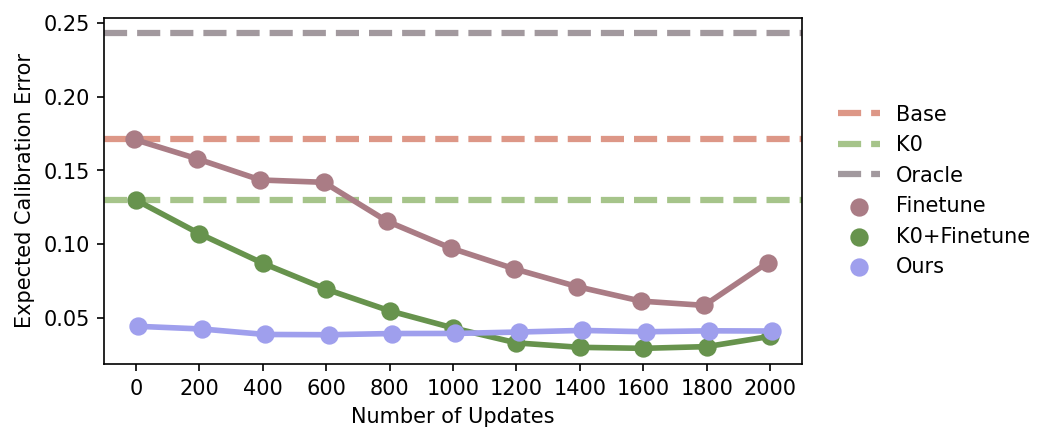

In [25]:
fig, ax = plt.subplots(dpi=150, figsize=(6, 3))

ax.axhline(y=base_ece, label="Base", ls="--", lw=3, c=AXHLINE_COLORS["Base"], zorder=0)
ax.axhline(y=k0_ece, label="K0", ls="--", lw=3, c=AXHLINE_COLORS["K0"], zorder=0)
ax.axhline(y=oracle_ece, label="Oracle", ls="--", lw=3, c=AXHLINE_COLORS["Oracle"], zorder=0)

sns.pointplot(x="num_updates", y="ece", data=combined_df, ax=ax,
              hue='method', hue_order=["Finetune", "K0+Finetune", "Ours"],
              dodge=True, palette=SEABORN_PALETTE)

ax.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0, frameon=False)

ax.set_ylabel("Expected Calibration Error")
ax.set_xlabel("Number of Updates")

fig.savefig(f"figures/peds_z12h_uncorrelated_offline_ece.pdf", bbox_inches="tight")

In [26]:
for calib_tuple in calib_list[1:]:
    num_updates, ours_calib, finetune_calib, k0_finetune_calib = calib_tuple
    
    if num_updates == 1:
        num_updates = 0
    
    if num_updates+1 in {1, 1000, 2000}:
        fig = make_calibration_plots(base_calib, k0_calib, oracle_calib, ours_calib, finetune_calib, k0_finetune_calib, num_updates+1)
        fig.savefig(f"figures/peds_calib_{num_updates+1}.pdf", bbox_inches="tight")
        plt.close(fig)

### nusc->lyft Online (Per-Agent) Relative Improvement

In [27]:
per_agent_rel_df = pd.read_csv("nuScenes/results/lyft_sample-mini_val_per_agent_online_rel.csv")
per_agent_rel_df.head()

,index,agent_ts,ml_ade,ml_fde,nll_mean,min_ade_5,min_ade_10,method
0,0,0,-41.514262,-48.054836,29.221888,-14.009310,-9.309620,Ours
1,1,10,-89.342071,-97.045697,-65.572277,-91.068784,-90.141061,Ours
2,2,20,-95.727094,-97.196821,-73.900543,-97.694707,-96.394198,Ours
3,3,30,-93.021326,-87.439958,-71.753171,-94.408437,-92.552519,Ours
4,4,40,-95.044624,-91.869130,-73.475106,-94.920902,-93.343900,Ours


In [28]:
metric_nice_name = {
    "ml_ade": "ADE Reduction",
    "ml_fde": "FDE Reduction",
    "nll_mean": "NLL Reduction",
    "min_ade_5": r"MinADE$_5$ Reduction",
    "min_ade_10": r"MinADE$_10$ Reduction"
}

In [29]:
import matplotlib.ticker as mtick

for idx, metric in enumerate(metrics_list):
    fig, ax = plt.subplots(dpi=150, figsize=(5, 3))

    sns.pointplot(x="agent_ts", y=metric, data=per_agent_rel_df[per_agent_rel_df["agent_ts"] % 20 == 0],
                  estimator=np.median, ax=ax, hue='method', hue_order=["Base", "Finetune", "K0", "K0+Finetune", "Ours", "Oracle"],
                  dodge=True, palette=SEABORN_PALETTE)
    
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.set_xlabel("Online-Observed Agent Timesteps")
    ax.set_ylabel(metric_nice_name[metric])
    ax.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0, frameon=False)

    fig.savefig(f"figures/lyft_sample-mini_val_per_agent_online_rel_{metric}.pdf", bbox_inches="tight")
    plt.close(fig)

### nusc->lyft Offline Relative Improvement

In [30]:
import pickle
with open("nuScenes/results/base_performance.pkl", 'rb') as f:
    eval_dict = pickle.load(f)
    
horizontal_lines_eval_df = pd.DataFrame.from_dict(eval_dict)
horizontal_lines_eval_df.head()

,model,ml_ade,ml_fde,nll_mean,min_ade_5,min_ade_10
0,Base,85.194153,179.695602,7.989746,48.195229,38.231281
1,K0,48.286816,89.617607,10.895922,35.551590,25.142607
2,Oracle,2.160857,5.328439,0.737295,1.275978,1.021723


In [31]:
combined_df = pd.read_csv("nuScenes/results/lyft_sample-mini_val_uncorrelated_offline_rel.csv")
combined_df.head()

,num_updates,ml_ade,ml_fde,nll_mean,min_ade_5,min_ade_10,method
0,0,-28.956533,-53.393635,91.300984,46.471728,16.714509,Ours
1,0,-28.799766,-56.946023,87.417688,3.500869,13.322745,Ours
2,0,-30.287869,-54.686011,74.318191,-32.094175,-20.658278,Ours
3,0,-27.177916,-52.534766,74.454085,-23.632767,-3.729717,Ours
4,0,-29.313004,-54.855360,62.709170,1.537626,12.625097,Ours


In [32]:
grouped_df = combined_df.groupby(by=["num_updates", "method"]).median().reset_index()

In [33]:
grouped_df = grouped_df[grouped_df.num_updates % 100 == 0]

In [34]:
grouped_df.head()

,num_updates,method,ml_ade,ml_fde,nll_mean,min_ade_5,min_ade_10
0,0,Finetune,-12.010875,-4.361365,-20.961133,-52.267666,-70.225601
1,0,K0+Finetune,-66.390172,-68.168146,16.163002,-70.171202,-78.535156
2,0,Ours,-44.978614,-50.205689,-22.118735,-52.744280,-60.615343
3,0,Ours+Finetune,-44.996896,-50.156515,-22.141954,-52.155310,-60.691566
8,100,Finetune,-43.998384,-38.796879,-54.772652,-89.187225,-89.218301


In [35]:
grouped_df.loc[:, metrics_list] -= grouped_df.loc[0, metrics_list]
grouped_df.head()

,num_updates,method,ml_ade,ml_fde,nll_mean,min_ade_5,min_ade_10
0,0,Finetune,0.0,0.0,0.0,0.0,0.0
1,0,K0+Finetune,-54.379298,-63.806781,37.124134,-17.903536,-8.309555
2,0,Ours,-32.967739,-45.844324,-1.157602,-0.476613,9.610258
3,0,Ours+Finetune,-32.986021,-45.79515,-1.180821,0.112357,9.534035
8,100,Finetune,-31.98751,-34.435514,-33.811519,-36.919559,-18.9927


In [36]:
metric_nice_name = {
    "ml_ade": "ADE Reduction",
    "ml_fde": "FDE Reduction",
    "nll_mean": "NLL Reduction",
    "min_ade_5": r"MinADE$_5$ Reduction",
    "min_ade_10": r"MinADE$_10$ Reduction"
}

In [37]:
import matplotlib.ticker as mtick

for idx, metric in enumerate(metrics_list):
    fig, ax = plt.subplots(dpi=150, figsize=(5, 3))

    # Base
    model_name = "Base"
    ax.axhline(y=grouped_df.loc[0, metric].item(), label=model_name, ls="--", lw=3, c=AXHLINE_COLORS[model_name], zorder=0)
    
    # K0
    model_name = "K0"
    ax.axhline(y=grouped_df.loc[1, metric].item(), label=model_name, ls="--", lw=3, c=AXHLINE_COLORS[model_name], zorder=0)
    
    # Oracle
    model_name = "Oracle"
    ref_val = horizontal_lines_eval_df.loc[0, metric].item()
    ax.axhline(y=100*(horizontal_lines_eval_df.loc[2, metric].item() - ref_val)/ref_val, label=model_name, ls="--", lw=3, c=AXHLINE_COLORS[model_name], zorder=0)

    sns.pointplot(x="num_updates", y=metric, data=grouped_df, ax=ax, hue='method', dodge=True, palette=SEABORN_PALETTE)

    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.set_xlabel("Number of Updates")
    ax.set_ylabel(metric_nice_name[metric])
    ax.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0, frameon=False)

    fig.savefig(f"figures/lyft_sample-mini_val_uncorrelated_offline_rel_{metric}.pdf", bbox_inches="tight")
    plt.close(fig)

### nusc->lyft Offline Calibration

In [38]:
import pickle
with open(f"nuScenes/results/model_calibrations.pkl", 'rb') as f:
    calib_list = pickle.load(f)

In [39]:
def fraction_gt_included(thresholds: np.ndarray, est_gt_probs: np.ndarray):
    num_gt_points = est_gt_probs.shape[0]
    # Commenting this out, although it could be used to scale to the max PDF height.
    # No need though, without it we can see overconfidence easier.
    # max_pdf = est_gt_probs.max()
    
    return [(est_gt_probs >= threshold).sum() / num_gt_points for threshold in thresholds]

In [40]:
def calibration_plot(est_gt_probs: np.ndarray, method_name: str, ax):
    thresholds = np.linspace(0, 1, 101)
    
    num_gt_points = est_gt_probs.shape[0]
    # Commenting this out, although it could be used to scale to the max PDF height.
    # No need though, without it we can see overconfidence easier.
    # max_pdf = est_gt_probs.max()
    
    fraction_gt_incl = fraction_gt_included(thresholds, est_gt_probs)
    
    ax.plot(thresholds, fraction_gt_incl, label=method_name, lw=2, c=SEABORN_PALETTE[method_name])

In [41]:
def make_calibration_plots(base_calib, k0_calib, oracle_calib, ours_calib, ours_finetune_calib, finetune_calib, k0_finetune_calib, num_updates):
    fig, ax = plt.subplots(figsize=(4, 2.4))

    calibration_plot(base_calib, "Base", ax)
    calibration_plot(finetune_calib, "Finetune", ax)
    calibration_plot(k0_calib, "K0", ax)
    calibration_plot(k0_finetune_calib, "K0+Finetune", ax)
    calibration_plot(ours_calib, "Ours", ax)
    calibration_plot(ours_finetune_calib, "Ours+Finetune", ax)
    calibration_plot(oracle_calib, "Oracle", ax)
    ax.plot([0, 1], [1, 0], label="Ideal", ls="--", c="k", zorder=0)

    if num_updates == 1000:
        ax.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0, frameon=False)
    
    ax.set_xlabel("Probability Threshold")
    
    if num_updates == 1:
        ax.set_ylabel("Fraction of GT Points")
    else:
        ax.set_ylabel(None)
        ax.set_yticklabels([])

    ax.grid(False)
    
    # ax.invert_yaxis()
    
    return fig

In [42]:
p1 = np.array([[0, 1]])
p2 = np.array([[1, 0]])
thresholds = np.linspace(0, 1, 101)

def expected_calibration_error(model_calib):
    calib_points_y = fraction_gt_included(thresholds, model_calib)
    p3s = np.stack([thresholds, calib_points_y], axis=1)
    distances = np.cross(p2-p1,p3s-p1)/np.linalg.norm(p2-p1)
    return np.abs(distances).sum()/101

In [43]:
_, base_calib, k0_calib, oracle_calib = calib_list[0]

In [44]:
base_ece = expected_calibration_error(base_calib)
k0_ece = expected_calibration_error(k0_calib)
oracle_ece = expected_calibration_error(oracle_calib)

In [45]:
num_updates = list()
ours_ece = list()
ours_finetune_ece = list()
finetune_ece = list()
k0_finetune_ece = list()

In [46]:
for calib_tuple in calib_list[1:]:
    data_sample, ours_calib, ours_finetune_calib, finetune_calib, k0_finetune_calib = calib_tuple
    
    ours_ece.append(expected_calibration_error(ours_calib))
    ours_finetune_ece.append(expected_calibration_error(ours_finetune_calib))
    finetune_ece.append(expected_calibration_error(finetune_calib))
    k0_finetune_ece.append(expected_calibration_error(k0_finetune_calib))
    
    num_updates.append(data_sample+1)

In [47]:
num_updates[0] = 0

In [48]:
num_steps = len(ours_ece)
combined_df = pd.DataFrame.from_dict({
    "method": ["Ours"]*num_steps + ["Ours+Finetune"]*num_steps + ["Finetune"]*num_steps + ["K0+Finetune"]*num_steps,
    "num_updates": num_updates*4,
    "ece": ours_ece + ours_finetune_ece + finetune_ece + k0_finetune_ece,
})

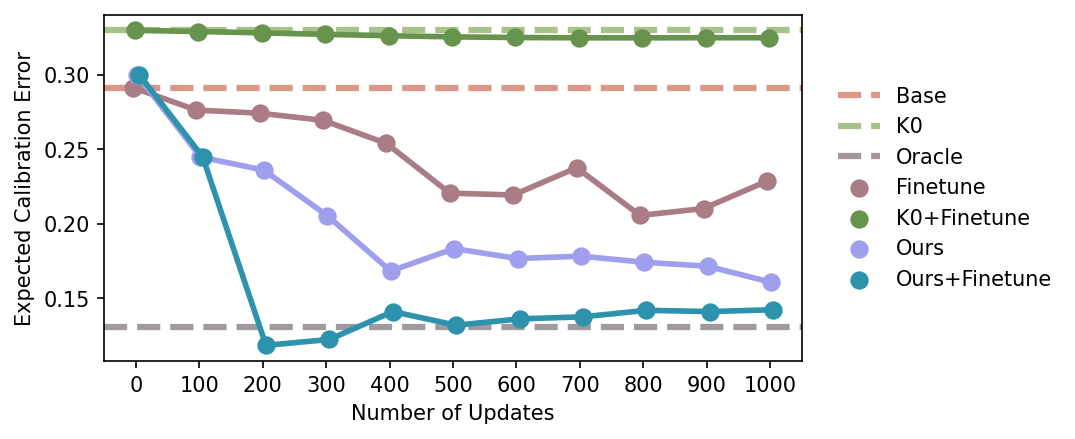

In [49]:
fig, ax = plt.subplots(dpi=150, figsize=(6, 3))

ax.axhline(y=base_ece, label="Base", ls="--", lw=3, c=AXHLINE_COLORS["Base"], zorder=0)
ax.axhline(y=k0_ece, label="K0", ls="--", lw=3, c=AXHLINE_COLORS["K0"], zorder=0)
ax.axhline(y=oracle_ece, label="Oracle", ls="--", lw=3, c=AXHLINE_COLORS["Oracle"], zorder=0)

sns.pointplot(x="num_updates", y="ece", data=combined_df, ax=ax,
              hue='method', hue_order=["Finetune", "K0+Finetune", "Ours", "Ours+Finetune"],
              dodge=True, palette=SEABORN_PALETTE)

ax.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0, frameon=False)

ax.set_ylabel("Expected Calibration Error")
ax.set_xlabel("Number of Updates")

fig.savefig(f"figures/lyft_sample-mini_val_uncorrelated_offline_ece.pdf", bbox_inches="tight")

In [51]:
for calib_tuple in calib_list[1:]:
    num_updates, ours_calib, ours_finetune_calib, finetune_calib, k0_finetune_calib = calib_tuple
    
    if num_updates == 1:
        num_updates = 0
    
    if num_updates+1 in {1, 500, 1000}:
        fig = make_calibration_plots(base_calib, k0_calib, oracle_calib, ours_calib, ours_finetune_calib, finetune_calib, k0_finetune_calib, num_updates+1)
        fig.savefig(f"figures/lyft_calib_{num_updates+1}.pdf", bbox_inches="tight")
        plt.close(fig)